## Fake News Prediction using Natural Language Processing 

In [3]:
## importing necessary packages

import pandas as pd
import numpy as np
import spacy
import re
import warnings
warnings.filterwarnings('ignore')

In [20]:
# loading the dataset
df = pd.read_csv('../Data/train.csv', error_bad_lines=False,encoding='iso-8859-1', warn_bad_lines=True)
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didnât Even See Comeyâs...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didnât Even See Comeyâs...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [21]:
# dimension of the dataframe
df.shape
# selecting only first 6000 rows because the dataset is big to be handled
#df = df.iloc[:6000,:]

(20800, 5)

In [22]:
# checking for null values 
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [25]:
df.columns

Index(['index', 'id', 'title', 'author', 'text', 'label'], dtype='object')

In [24]:
# dropping na values and resetting the index
df = df.dropna().reset_index()

In [16]:
# checking shape after removal of na values
df.shape

(18285, 5)

In [ ]:
# we dont need "id" column, so dropping it
df = df.drop(['id','index'], axis=1)
df.head()

In [27]:
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

#### We have 55% of the data with 0 class and 45% of the data with 1 class

In [19]:
### removing special characters
##def removeSpecialChars(mystring):
##    mystring = mystring.lower()
##    return re.sub('[^A-Za-z0-9 ]+', '', str(mystring))

In [20]:
## storing processed text output in new column
##df['procecssed_text'] = df['text'].apply(lambda x: removeSpecialChars(x))
##df['procecssed_text'].head()

In [31]:
## removing stopwords and lemmatization using spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()


In [32]:
# function to lemmatize the sentences and removing stopwords present in it
word_corpus = []
def lemmatizeAndStopwordsRem(string):
    string = string.lower()
    string = re.sub('[^A-Za-z]+', ' ', str(string)) # removing everything except alphabets
    string = nlp(string)
    processed = []
    for word in string:
        word = word.lemma_
        if str(word) not in nlp.Defaults.stop_words:
            processed.append(word)
    processed = " ".join(processed)
    word_corpus.append(processed)
    return processed


In [33]:
# applying function on complete "text" column
df['processed'] = df['text'].apply(lambda x: lemmatizeAndStopwordsRem(x))
df['processed']



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Pleaseuse the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\ProgramData\Anaconda3\envs\fastai\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.C:\ProgramData\Anaconda3\envs\fastai\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

  _np_qint8 = np.dtype([("qint8", np.int8, 1)])  _np_qint8 = np.dtype([("qint8", np.int8, 1)])

C:\ProgramData\Anaconda3\envs\fastai\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.C:\ProgramData\Anaconda3\envs\fastai\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (typ

0        house dem aide didn t comey s letter jason cha...
1        feeling life circle roundabout head straight l...
2        truth fire october tension intelligence analys...
3        video civilian kill single airstrike identify ...
4        print iranian woman sentence year prison iran ...
                               ...                        
18280    rapper t I unload black celebrity meet donald ...
18281    green bay packer lose washington redskin week ...
18282    macy s today grow union great american retaili...
18283    nato russia hold parallel exercise balkan pres...
18284      david swanson author activist journalist rad...
Name: processed, Length: 18285, dtype: object

In [34]:
# CountVectorizer to create a vector of every word(it actually counts a term frequency of every word) AKA one_hot_encoding
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000, ngram_range= (1,3)) # ngram_range specifies min and max size of ngrams  

In [35]:
# checking no of words in a random row
# len(max(word_corpus))
len(word_corpus[118].split(" "))
# word_corpus[50]

584

In [36]:
x = cv.fit_transform(word_corpus).toarray()
y = df['label']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [38]:
cv.get_feature_names()[:2]

['aaron', 'abandon']

In [39]:
processed_df = pd.DataFrame(X_train, columns = cv.get_feature_names())
processed_df.head()

aaron  abandon  abbott  abc  abc news  abe  abedin  abide  ability  able  \
0      0        0       0    0         0    0       0      0        0     0   
1      0        0       0    0         0    0       0      0        0     0   
2      0        0       0    0         0    0       0      0        0     1   
3      0        0       0    0         0    0       0      0        0     0   
4      0        0       0    0         0    0       0      0        0     0   

   ...  youtube  zealand  zero  zika  zika virus  zionist  zone  zoo  zu  \
0  ...        0        0     0     0           0        0     0    0   0   
1  ...        0        0     0     0           0        0     0    0   0   
2  ...        0        0     0     0           0        0     2    0   0   
3  ...        0        0     0     0           0        0     0    0   0   
4  ...        0        0     0     0           0        0     0    0   0   

   zuckerberg  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 7000 columns]

## Naive Bayes Algorithm  

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix
classifier = MultinomialNB()

In [41]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.89937106918239


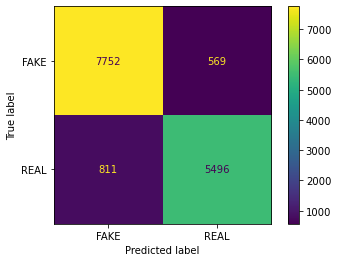

In [43]:
plot_confusion_matrix(classifier, X_train, y_train, display_labels=['FAKE','REAL'])

We can see that acccuracy of Naive Bayes is ~89%.

we will try SVM classifier which also does great in case of text data

### SVM-SGD

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
svm_clf = SGDClassifier(loss='hinge', alpha=0.001, random_state=42)
svm_clf.fit(X_train, y_train)


SGDClassifier(alpha=0.001, random_state=42)

In [46]:
y_preds = svm_clf.predict(X_test)
accuracy= accuracy_score(y_test, y_preds)
print(accuracy)

0.9461307082307903


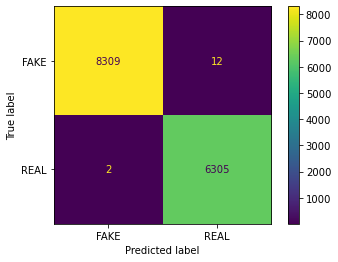

In [47]:
## creating confusion matrix 
plot_confusion_matrix(svm_clf, X_train, y_train, display_labels=['FAKE','REAL'])

Here we can see that the accuracy of SGD classifier(~0.94) is better than NaiveBayes(0.91).

### LSTM

we will try with LSTM for classification of text

In [48]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [49]:
vocab_size = 10000

In [50]:
# one hot representation of words. It will create a vector for every word where only that index will be 1 where the word is present
one_hot_rep = [one_hot(word, vocab_size) for word in word_corpus]
one_hot_rep

[[9892,
  3083,
  9188,
  9367,
  9308,
  2913,
  973,
  6101,
  8954,
  3415,
  8100,
  9045,
  2942,
  1123,
  2246,
  8954,
  3415,
  6947,
  3202,
  7216,
  490,
  754,
  9488,
  6545,
  4554,
  7074,
  6327,
  6789,
  5794,
  532,
  1593,
  479,
  9900,
  6518,
  5059,
  7323,
  1796,
  9521,
  1974,
  6429,
  2913,
  6348,
  9892,
  3626,
  9188,
  8254,
  2929,
  6629,
  354,
  6518,
  5059,
  4447,
  2913,
  7261,
  2063,
  6101,
  9534,
  9521,
  8254,
  6153,
  1891,
  2995,
  5846,
  973,
  6153,
  300,
  1531,
  1249,
  2989,
  9367,
  9367,
  9308,
  3853,
  2913,
  8387,
  8100,
  4482,
  9367,
  3803,
  6629,
  2913,
  9652,
  4482,
  3803,
  3626,
  1531,
  8666,
  9892,
  366,
  1541,
  3206,
  9367,
  2795,
  859,
  6153,
  9216,
  3676,
  4378,
  4241,
  4850,
  6284,
  9928,
  6101,
  3206,
  9367,
  3803,
  8954,
  3415,
  8742,
  3504,
  7323,
  4426,
  8100,
  9521,
  8994,
  8143,
  1808,
  9521,
  2812,
  2814,
  6153,
  5304,
  2053,
  5910,
  4252,
  2917,
  

In [51]:
# now we have to give it to embedding layer but for this we need every sentence to be of same length which can be done by using 
# pad_sequences which padds zeros at the end or start of the sentence.
sen_length = 400
embedded_doc = pad_sequences(one_hot_rep, padding='post', maxlen=sen_length)

In [52]:
len(embedded_doc)

18285

In [53]:
embedded_doc[50]

array([ 160, 3081, 4280,  558, 9502, 9892, 4482, 6326, 6939, 4079, 3057,
       7855,  423,  973, 4817, 7373, 2524, 5891, 9502, 9329, 6262, 5933,
       9212, 9770, 5891, 3382, 7882, 8421, 7383, 7316,  973, 8175, 9016,
       6412, 4281, 7030, 3414, 8829, 4079, 6574, 8314, 5820, 1153, 6427,
       3256, 8208, 4079, 2764,  251, 6262, 5933,  722, 7855, 4079, 5918,
       1600, 3888, 7855, 3653, 5109, 4718, 8926,  130, 1413, 1528, 5133,
        621, 7373, 2524, 8392, 5891, 4079, 8015, 5109, 5074, 4397, 9537,
       3742, 3253, 7030, 9212, 7296, 7110, 7030, 7437, 4079, 1494, 4378,
       3742, 6227, 2475, 6105, 1802, 9308, 3581, 4668, 7296, 1302, 3263,
       8993,  574, 4079, 2954, 6615, 9587, 8666, 2279, 8240, 8785, 5309,
         13, 5347, 9892, 3324, 1289, 1475, 9838, 1172, 4140, 3726, 8278,
       7724, 4391,  166, 3081, 1673, 4668,  997, 6214, 3252, 6389, 4283,
       7521, 4283, 2101, 4008, 9212, 5992, 4279, 3202, 7030, 1813, 7099,
       8305, 4079, 2954, 3382, 3256,  997, 9329, 78

In [54]:
# model creation
embedding_vec_features = 200 # features for creating word embedding 
model = Sequential()
model.add(Embedding(vocab_size, embedding_vec_features, input_length = sen_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 200)          2000000   
_________________________________________________________________
dropout (Dropout)            (None, 400, 200)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,120,501
Trainable params: 2,120,501
Non-trainable params: 0
_________________________________________________________________


In [56]:
# here we have to provide embedded data as input to the LSTM  
X = np.array(embedded_doc)
y = np.array(y)

In [57]:
X.shape

(18285, 400)

In [58]:
y.shape

(18285,)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=None)

In [60]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, batch_size=64)

Train on 14628 samples, validate on 3657 samples
Epoch 1/20
14628/14628 [==============================] - 309s 21ms/sample - loss: 0.5588 - acc: 0.6520 - val_loss: 0.5040 - val_acc: 0.6508
Epoch 2/20
14628/14628 [==============================] - 314s 21ms/sample - loss: 0.4905 - acc: 0.7143 - val_loss: 0.6067 - val_acc: 0.6120
Epoch 3/20
14628/14628 [==============================] - 299s 20ms/sample - loss: 0.3502 - acc: 0.8378 - val_loss: 0.3374 - val_acc: 0.8715
Epoch 4/20
14628/14628 [==============================] - 325s 22ms/sample - loss: 0.3746 - acc: 0.8540 - val_loss: 0.4804 - val_acc: 0.8203
Epoch 5/20
14628/14628 [==============================] - 314s 21ms/sample - loss: 0.3086 - acc: 0.8842 - val_loss: 0.3821 - val_acc: 0.8534
Epoch 6/20
14628/14628 [==============================] - 312s 21ms/sample - loss: 0.2155 - acc: 0.9206 - val_loss: 0.3219 - val_acc: 0.8895
Epoch 7/20
14628/14628 [==============================] - 310s 21ms/sample - loss: 0.1975 - acc: 0.9303 -

In [64]:
# prediction on test data
y_pred = model.predict_classes(X_test)

In [65]:
# checking accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[1986,   79],
       [ 216, 1376]], dtype=int64)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9193327864369701


LSTM accuracy is 91% which is better than SGD. So in this case SGD performed well as compared to others.  